In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

#
 This data originally from https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

서울 안에서 이동하거나 서울 외부에서 서울로 오고 간 이동으로 통근, 통학, 쇼핑, 여가 등 행정수요를 유발하는 모든 이동 

"All movements that generate administrative demand, such as commuting, attending school, shopping, and leisure activities, either within Seoul or from outside Seoul to Seoul."

This phrase describes various types of mobility within and into Seoul that create different types of administrative demands for city management and resources.

 I Preprocessed for you

In [27]:
od_adm=pd.read_csv('https://raw.githubusercontent.com/XUAN-24601/Korea_Spatial/main/od_3years.csv')
od_adm['ADM_CD_D']=od_adm['ADM_CD_D'].astype('str')
od_adm['ADM_CD_O']=od_adm['ADM_CD_O'].astype('str')

In [28]:
od_adm.head()

,Unnamed: 0,time,ADM_CD_O,ADM_CD_D,type,flux,year
0,29,202001,21000,1101061,HW,50.62,2020
1,68,202001,21000,1102054,HW,54.84,2020
2,75,202001,21000,1102055,HW,59.04,2020
3,910,202001,21000,1119054,HW,95.09,2020
4,1458,202001,22000,1101061,HW,97.46,2020


In [40]:
od=pd.read_pickle('https://raw.githubusercontent.com/XUAN-24601/Korea_Spatial/main/OD/adm_od_5179.csv')
ef_with_od=od_adm.set_index(['ADM_CD_O','ADM_CD_D']).merge(od,left_index=True,right_index=True)

In [33]:
ef_with_od

Unnamed: 0    time type      flux  year  \
ADM_CD_O ADM_CD_D                                            
1101053  1101053        21849  202001   HW   3991.44  2020   
         1101053      1638810  202101   HW   2687.66  2021   
         1101053      3027468  202201   HW   2821.51  2022   
         1101054        21857  202001   HW    467.05  2020   
         1101054      1638818  202101   HW    250.86  2021   
...                       ...     ...  ...       ...   ...   
1125074  1125073      2597346  202101   HW   4763.01  2021   
         1125073      4061835  202201   HW   3672.39  2022   
         1125074      1137381  202001   HW  12990.83  2020   
         1125074      2597355  202101   HW   9338.51  2021   
         1125074      4061844  202201   HW  15508.43  2022   

                                                             Line_OD  \
ADM_CD_O ADM_CD_D                                                      
1101053  1101053   LINESTRING (953232.431 1952855.901, 953232.431...   
         1101053   LINESTRING (953232.431 1952855.901, 953232.431...   
         1101053   LINESTRING (953232.431 1952855.901, 953232.431...   
         1101054   LINESTRING (953232.431 1952855.901, 954197.486...   
         1101054   LINESTRING (953232.431 1952855.901, 954197.486...   
...                                                              ...   
1125074  1125073   LINESTRING (968723.462 1948989.213, 966609.275...   
         1125073   LINESTRING (968723.462 1948989.213, 966609.275...   
         1125074   LINESTRING (968723.462 1948989.213, 968723.462...   
         1125074   LINESTRING (968723.462 1948989.213, 968723.462...   
         1125074   LINESTRING (968723.462 1948989.213, 968723.462...   

                      Distance  
ADM_CD_O ADM_CD_D               
1101053  1101053      0.000000  
         1101053      0.000000  
         1101053      0.000000  
         1101054   1869.032801  
         1101054   1869.032801  
...                        ...  
1125074  1125073   2196.575708  
         1125073   2196.575708  
         1125074      0.000000  
         1125074      0.000000  
         1125074      0.000000  

[237974 rows x 7 columns]

<AxesSubplot:>

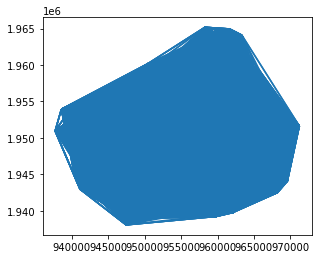

In [41]:
ef_with_od=gpd.GeoDataFrame(ef_with_od,geometry='Line_OD')
ef_with_od.plot()
# such a terrible visiualization ha~

<AxesSubplot:>

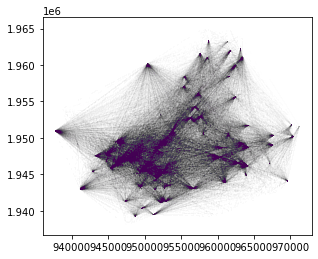

In [42]:
# let's change linewidth
ef_with_od.plot('flux',linewidth=0.0003)


Looks cool ha ~
What can you say from this plot about Seoul mobility network?
what if we want to see the network in 2020,2021,and 2022 spreately?
Easy

In [49]:
ef=pd.pivot_table(od_adm, values=['flux'], index=['ADM_CD_O','ADM_CD_D'],columns=['year']).merge(od,left_index=True,right_index=True)
ef=gpd.GeoDataFrame(ef,geometry='Line_OD')

Text(0.5, 1.0, '2020')

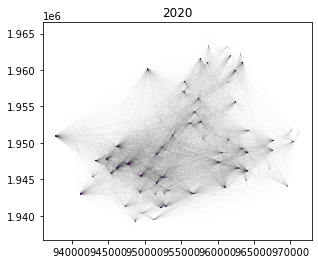

In [54]:
# let's try plot
ef.plot(('flux',2020),linewidth=0.0003).set_title('2020')


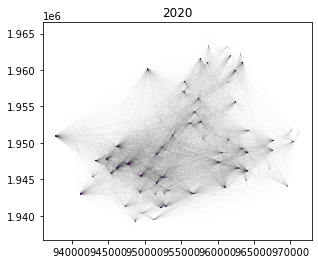

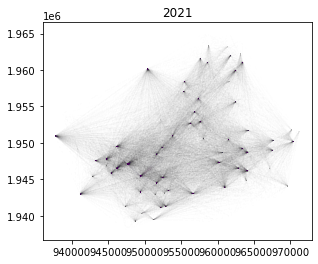

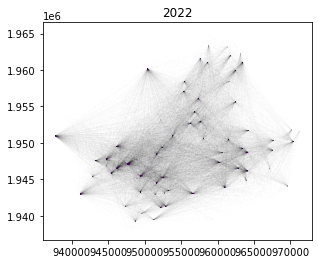

In [55]:
for year in [2020,2021,2022]:
    ef.plot(('flux',year),linewidth=0.0003).set_title(year)


What can you say from these 3 plots about COVID-19?

Something changed. 
So what?

What else we can do?

Do some calucations

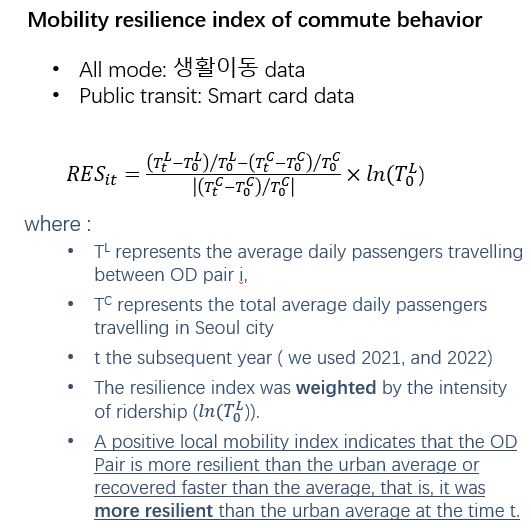

In [57]:

for i in ['flux']:
    ef[i,'%20-21']=(ef[i,2021]-ef[i,2020])/ef[i,2020]
    ef[i,'%20-22']=(ef[i,2022]-ef[i,2020])/ef[i,2020]
rel=ef[[( 'flux', '%20-21'),( 'flux', '%20-22')]].transform(lambda x:(x-x.median())/abs(x.median()))
rel.columns=[('Resilience', '2020-2021'),
            
            ('Resilience', '2020-2022')] 
rel


(Resilience, 2020-2021)  (Resilience, 2020-2022)
ADM_CD_O ADM_CD_D                                                  
1101053  1101053                 -0.875778                -1.955186
         1101054                 -1.658146                -3.785178
         1101055                 -0.469416                -1.432706
         1101056                 -1.231000                      NaN
         1101057                  2.619771                 8.614184
...                                    ...                      ...
1125074  1125070                  3.800822                -2.231440
         1125071                 -0.931290                 0.832762
         1125072                 -0.608743                -2.400317
         1125073                  0.308028                -2.245296
         1125074                 -0.614502                 2.953909

[102761 rows x 2 columns]

In [58]:
ef=pd.concat([ef,rel],axis=1).dropna()
ef.head()
for i in [('Resilience', '2020-2021'),
           
            ('Resilience', '2020-2022')] :
    ef[i]=ef[i]*np.log(ef[('flux', 2020)])
    #ef[i]=preprocessing.normalize( [ef[i].to_xarray()])
ef

(flux, 2020)  (flux, 2021)  (flux, 2022)  \
ADM_CD_O ADM_CD_D                                             
1101053  1101053        3991.44       2687.66       2821.51   
         1101054         467.05        250.86        245.38   
         1101055         263.13        195.80        199.64   
         1101057         104.09        133.45        182.70   
         1101058         642.44        332.20        355.17   
...                         ...           ...           ...   
1125074  1125070         135.69        201.87         92.20   
         1125071        8080.80       5363.14       7946.76   
         1125072        2405.77       1731.81       1594.40   
         1125073        5415.58       4763.01       3672.39   
         1125074       12990.83       9338.51      15508.43   

                                                             Line_OD  \
ADM_CD_O ADM_CD_D                                                      
1101053  1101053   LINESTRING (953232.431 1952855.901, 953232.431...   
         1101054   LINESTRING (953232.431 1952855.901, 954197.486...   
         1101055   LINESTRING (953232.431 1952855.901, 952643.877...   
         1101057   LINESTRING (953232.431 1952855.901, 952193.444...   
         1101058   LINESTRING (953232.431 1952855.901, 952678.117...   
...                                                              ...   
1125074  1125070   LINESTRING (968723.462 1948989.213, 968226.306...   
         1125071   LINESTRING (968723.462 1948989.213, 968832.787...   
         1125072   LINESTRING (968723.462 1948989.213, 967724.156...   
         1125073   LINESTRING (968723.462 1948989.213, 966609.275...   
         1125074   LINESTRING (968723.462 1948989.213, 968723.462...   

                      Distance  (flux, %20-21)  (flux, %20-22)  \
ADM_CD_O ADM_CD_D                                                
1101053  1101053      0.000000       -0.326644       -0.293110   
         1101054   1869.032801       -0.462884       -0.474617   
         1101055   2629.471281       -0.255881       -0.241288   
         1101057   1100.601941        0.282064        0.755212   
         1101058    635.331944       -0.482909       -0.447155   
...                        ...             ...             ...   
1125074  1125070   1909.128274        0.487729       -0.320510   
         1125071    937.387800       -0.336311       -0.016587   
         1125072   1681.270352       -0.280143       -0.337260   
         1125073   2196.575708       -0.120499       -0.321884   
         1125074      0.000000       -0.281146        0.193798   

                   (Resilience, 2020-2021)  (Resilience, 2020-2022)  
ADM_CD_O ADM_CD_D                                                    
1101053  1101053                 -7.261866               -16.212224  
         1101054                -10.191689               -23.265359  
         1101055                 -2.615892                -7.983964  
         1101057                 12.169507                40.015091  
         1101058                -11.463837               -22.682085  
...                                    ...                      ...  
1125074  1125070                 18.663454               -10.957205  
         1125071                 -8.379041                 7.492566  
         1125072                 -4.739444               -18.687971  
         1125073                  2.648124               -19.302891  
         1125074                 -5.820561                27.979427  

[58064 rows x 9 columns]

In [59]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [61]:
ef_with_od=ef.copy()
ef_with_od[[('Resilience', '2020-2021'),
       ('Resilience', '2020-2022')]]=scaler.fit_transform(ef_with_od[[('Resilience', '2020-2021'),
       ('Resilience', '2020-2022')]])
ef_with_od.head()

(flux, 2020)  (flux, 2021)  (flux, 2022)  \
ADM_CD_O ADM_CD_D                                             
1101053  1101053        3991.44       2687.66       2821.51   
         1101054         467.05        250.86        245.38   
         1101055         263.13        195.80        199.64   
         1101057         104.09        133.45        182.70   
         1101058         642.44        332.20        355.17   

                                                             Line_OD  \
ADM_CD_O ADM_CD_D                                                      
1101053  1101053   LINESTRING (953232.431 1952855.901, 953232.431...   
         1101054   LINESTRING (953232.431 1952855.901, 954197.486...   
         1101055   LINESTRING (953232.431 1952855.901, 952643.877...   
         1101057   LINESTRING (953232.431 1952855.901, 952193.444...   
         1101058   LINESTRING (953232.431 1952855.901, 952678.117...   

                      Distance  (flux, %20-21)  (flux, %20-22)  \
ADM_CD_O ADM_CD_D                                                
1101053  1101053      0.000000       -0.326644       -0.293110   
         1101054   1869.032801       -0.462884       -0.474617   
         1101055   2629.471281       -0.255881       -0.241288   
         1101057   1100.601941        0.282064        0.755212   
         1101058    635.331944       -0.482909       -0.447155   

                   (Resilience, 2020-2021)  (Resilience, 2020-2022)  
ADM_CD_O ADM_CD_D                                                    
1101053  1101053                 -0.632334                -0.667232  
         1101054                 -0.818616                -0.873772  
         1101055                 -0.336936                -0.426281  
         1101057                  0.603141                 0.979293  
         1101058                 -0.899501                -0.856692

## Plot raw data

1426.2010000000005


<AxesSubplot:>

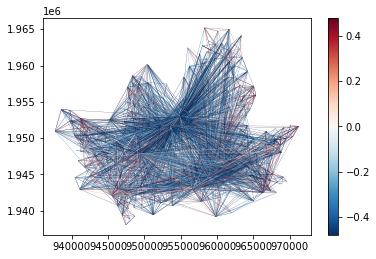

In [62]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
cut_line=ef_with_od[('flux',2020)].quantile(0.90)

print(cut_line)
data_to_show=ef_with_od.loc[ef_with_od.iloc[:,0]>cut_line].reset_index()
"""
data_to_show[[('Resilience', '2020-2021'),
       ('Resilience', '2020-2022')]]=scaler.fit_transform(data_to_show[[('Resilience', '2020-2021'),
       ('Resilience', '2020-2022')]])
"""
data_to_show['geometry']=data_to_show['Line_OD']
data_to_show =gpd.GeoDataFrame(data_to_show, geometry='geometry')
vmax=data_to_show[('Resilience','2020-2021')].quantile(0.95)
data_to_show.plot(('Resilience', '2020-2022'),cmap='RdBu_r',legend=True,linewidth=np.log(data_to_show[('flux',2020)])/40,vmax=vmax,vmin=-vmax)

In [63]:
import matplotlib.pyplot as plt
import contextily

In [64]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def create_submap(gdf, feas, row, title='Mobility Resilience - Public transit ', location='Seoul'):
    col = int(len(feas) / row)
    # Create a grid of subplots with the specified number of rows and columns
    fig, axs = plt.subplots(row, col, figsize=(10 * col, 9 * row), facecolor='w', edgecolor='k', constrained_layout=True)
    fig.subplots_adjust(hspace=.1, wspace=.1)
    axs = axs.ravel()

    for i in range(len(feas)):
        # Sort the input GeoDataFrame by flux values for the year 2020 and select the top 2000 entries
        gdf = gdf.sort_values(('flux', 2020), ascending=False)[:2000]

        # Calculate the maximum value for the color scale using the 98th percentile of the Resilience values
        vmax = gdf[('Resilience', feas[i])].quantile(0.98)

        # Fit a scaler to the flux values and calculate the linewidths for the plot
        scaler.fit(gdf[('flux', 2020)].values.reshape(-1, 1))
        linewidths = scaler.transform(gdf[('flux', 2020)].values.reshape(-1, 1))[:, 0] * 1.2

        # Create a colorbar axis on the right side of the plot
        divider = make_axes_locatable(axs[i])
        cax = divider.append_axes("right", size="6%", pad=0.1)

        # Filter out entries with Resilience values greater than 10
        gdf_plot = gdf[gdf[('Resilience', feas[i])] < 10]

        # Create the plot with the specified color map and line widths
        gdf_plot.plot(('Resilience', feas[i]), cmap='RdBu_r',
                      legend=True,
                      linewidth=linewidths,
                      ax=axs[i], vmin=-vmax, vmax=vmax, cax=cax)

        
        axs[i].set_title(feas[i], fontsize=25)
        axs[i].set_xlim(938000, 970000)
        axs[i].set_ylim(1936000, 1967000)

        # Add basemap
        contextily.add_basemap(axs[i], crs=gdf.crs, source=contextily.providers.Stamen.TonerLite)

        # Remove axes
        axs[i].set_axis_off()

    # Set the title for the entire figure
    fig.suptitle(title, fontsize=30)
    fig.show()

    return fig

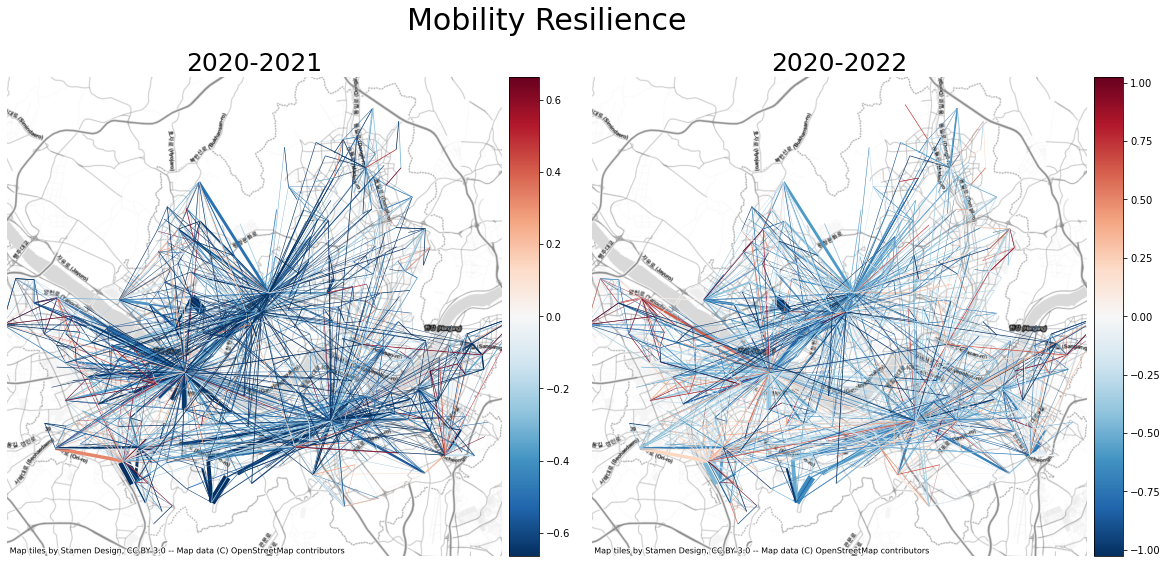

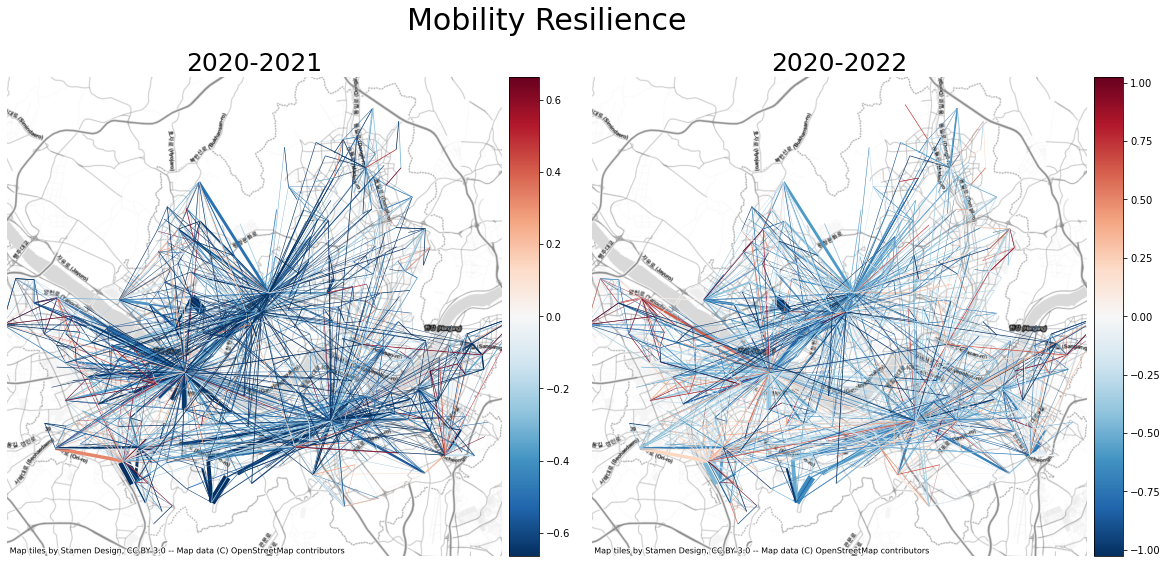

In [65]:
create_submap(data_to_show,['2020-2021','2020-2022'], row=1,title='Mobility Resilience')